# The Theory

In [1]:
import MinimalTools as MT
import PhysConst as PC
import numpy as np

First we will create a PhysicsConstant() object that will not only contain units, but also contain the standard mixing angles.

In [2]:
pc = PC.PhysicsConstants()

we can set the standard mixing angles. We will use the values given in arXiv:1409.5439.

In [3]:
degree = np.pi/180.0
pc.th12 = 33.36*degree#33.48*degree
pc.th23 = 45.*degree#42.3*degree
pc.th13 = 8.66*degree#8.5*degree
pc.delta1 = 0.0#300.0*degree#306.*degree # perhaps better just set to 0.
pc.dm21sq = 0.#7.5e-5
pc.dm31sq = 0.#2.47e-3#2.457e-3
pc.Refresh()

Using this object we can calculate the standard mixing matrix

In [4]:
MT.calcU(pc)

array([[ 0.82570969+0.j,  0.54362852+0.j,  0.15057068+0.j],
       [-0.47776322+0.j,  0.53205082+0.j,  0.69904523+0.j],
       [ 0.29990967+0.j, -0.64914556+0.j,  0.69904523+0.j]])

It is rather more useful to calculate $U \Delta m^2 U^{\dagger}$. Which is done with the following function.

In [5]:
DELTAM2 = MT.flavorM2(pc)
DELTAM2

array([[ 0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j]])

I have defined a subclass of PhysicsConstant() to contain the LV term information. I will use the same parametrization as in arXiv:1001.4878. Namely

$$ LVT = E^n (U_{LV}(\bar\theta) \Delta U^{\dagger}_{LV}(\bar\theta))$$

where $\bar\theta$ are some new angles that describe the LV flavor structure and $\Delta$ contains the LV scales, namely, in three generations, $\Delta = diag(0,lvs_1,lvs_2)$.

In [6]:
lva = MT.LVP()

In [7]:
degree = np.pi/180.0
lva.th12 = 5.0*degree
lva.th13 = 45.0*degree
lva.th23 = 60.0*degree
lva.LVS21 = 1.0e-26*pc.GeV
lva.LVS31 = 1.0e-26*pc.GeV
lva.delta1 = 0.0*degree
lva.Refresh()

In [8]:
LVATERM = MT.LVTerm(lva); print (LVATERM)

[[  5.03798062e-18+0.j   4.60420435e-18+0.j   1.94932290e-18+0.j]
 [  4.60420435e-18+0.j   5.72780837e-18+0.j  -1.80875573e-18+0.j]
 [  1.94932290e-18+0.j  -1.80875573e-18+0.j   9.23421102e-18+0.j]]


In [9]:
# can also define terms by components a la Teppei
#LVATERM = 1.0e-26*pc.GeV*np.array([[1,1,1],[1,1,1],[1,1,1]]); print (LVATERM)

We need a similar matrix for the C-term

In [10]:
lvc = MT.LVP()
degree = np.pi/180.0
lvc.th12 = 5.0*degree
lvc.th23 = 35.0*degree
lvc.th13 = 60.0*degree
lvc.LVS21 = 0.#1.0e-29
lvc.LVS31 = 0.#1.0e-29
lvc.Refresh()
LVCTERM = MT.LVTerm(lvc); print (LVCTERM)

[[ 0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j]]


In [11]:
# can also define terms by components a la Teppei
#LVCTERM = 1.0e-29*np.array([[1,1,1],[1,1,1],[1,1,1]]); print (LVCTERM)

Now we define the Hamiltonian as usual

In [14]:
def Hamiltonian(Enu, LVATERM = np.zeros((3,3), dtype=np.complex),
                LVCTERM = np.zeros((3,3), dtype=np.complex)):
    return DELTAM2/(2.0*Enu) + LVATERM + Enu*LVCTERM 

In [15]:
LVCTERM,LVATERM

(array([[ 0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j]]),
 array([[  5.03798062e-18+0.j,   4.60420435e-18+0.j,   1.94932290e-18+0.j],
        [  4.60420435e-18+0.j,   5.72780837e-18+0.j,  -1.80875573e-18+0.j],
        [  1.94932290e-18+0.j,  -1.80875573e-18+0.j,   9.23421102e-18+0.j]]))

In [38]:
Hamiltonian(1.0*pc.GeV, LVCTERM=LVCTERM, LVATERM=LVATERM)

array([[  5.03798062e-18+0.j,   4.60420435e-18+0.j,   1.94932290e-18+0.j],
       [  4.60420435e-18+0.j,   5.72780837e-18+0.j,  -1.80875573e-18+0.j],
       [  1.94932290e-18+0.j,  -1.80875573e-18+0.j,   9.23421102e-18+0.j]])

We now have to diagonalize this matrix in order to find the new mixing matrix

In [39]:
eigenvals, eigenvectors = MT.eigenvectors(Hamiltonian(1.0*pc.GeV,LVCTERM=LVCTERM, LVATERM=LVATERM)*1.0e13)

In [40]:
print eigenvals,"\n",eigenvectors

[(-9.6194121404548681e-21+0j), (9.9999999999999991e-05+0j), (0.00010000000000000005+0j)] 
[array([ 0.70441603+0.j, -0.65362005+0.j, -0.27672893+0.j]), array([ 0.08530995+0.j, -0.30908488+0.j,  0.94720048+0.j]), array([ 0.70978734+0.j,  0.64867378-0.j,  0.27463478-0.j])]


Then the transition probability between $\alpha = e = 0$ and $\beta = \mu = 1$, assuming complete decoherence, is

In [41]:
sum(FlavorRatio([0.,1.,0],1.0*pc.GeV,LVATERM=LVATERM))

0.97098186562330879

In [42]:
def OscProbFromMixingMatrix(alpha, beta, MixMatrix):
    prob = 0.0;
    for i in range(pc.numneu) :
        prob += (np.absolute(MixMatrix[alpha][i]))**2*(np.absolute(MixMatrix[beta][i]))**2
    return prob

Wrapping this up

In [43]:
def OscProb(alpha, Enu, LVATERM = np.zeros((3,3), dtype=np.complex),
                LVCTERM = np.zeros((3,3), dtype=np.complex)):
    eigvals, eigvec = MT.eigenvectors(Hamiltonian(Enu, LVATERM=LVATERM, LVCTERM=LVCTERM))
    return [ OscProbFromMixingMatrix(alpha,beta,eigvec) for beta in range(pc.numneu)]

We can then calculate the propagated flavors given an initial flavor ratio

In [44]:
def FlavorRatio(initial_flavor_ratio, Enu, LVATERM = np.zeros((3,3), dtype=np.complex),
                LVCTERM = np.zeros((3,3), dtype=np.complex)):
    final_flavor_ratio = [0.0]*pc.numneu
    osc_prob_array = [OscProb(beta,Enu,LVATERM=LVATERM,LVCTERM=LVCTERM) for beta in range(pc.numneu)]
    
    for alpha in range(pc.numneu):
        for beta,phi in enumerate(initial_flavor_ratio):
            final_flavor_ratio[alpha] += osc_prob_array[beta][alpha]*phi
    return final_flavor_ratio

In [45]:
def RRR(initial_flavor_ratio, Enu, LVATERM = np.zeros((3,3), dtype=np.complex),
                LVCTERM = np.zeros((3,3), dtype=np.complex)):
    ffr = FlavorRatio(initial_flavor_ratio,Enu,LVATERM=LVATERM,LVCTERM=LVCTERM)
    return ffr[1]/ffr[0]
def SSS(initial_flavor_ratio, Enu, LVATERM = np.zeros((3,3), dtype=np.complex),
                LVCTERM = np.zeros((3,3), dtype=np.complex)):
    ffr = FlavorRatio(initial_flavor_ratio,Enu,LVATERM=LVATERM,LVCTERM=LVCTERM)
    return ffr[2]/ffr[1]

In [46]:
%timeit FlavorRatio([1,2,0], 2000.0*pc.GeV, LVCTERM=LVCTERM, LVATERM=LVATERM)

1000 loops, best of 3: 318 µs per loop


#Plots#

In [47]:
get_ipython().magic(u'matplotlib inline')
import matplotlib.pyplot as plt
import matplotlib.collections as mco
import matplotlib as mpl
mpl.rc('font', family='serif', size=20)

(0.29, 0.36)

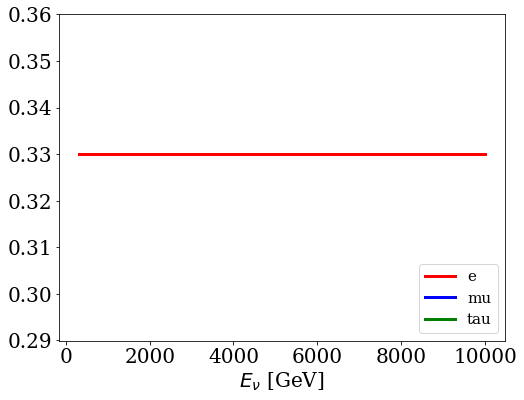

In [48]:
Erange = np.logspace(2.5,4,100) # in GeV
fr = [0.33,0.66,0.]

nu_e = [ FlavorRatio(fr,EE*pc.GeV)[0] for EE in Erange ]
nu_mu = [ FlavorRatio(fr,EE*pc.GeV)[1] for EE in Erange ]
nu_tau = [ FlavorRatio(fr,EE*pc.GeV)[2] for EE in Erange ]

plt.figure(figsize = (8,6))
plt.plot(Erange,nu_e, label = "e", lw = 3, color = "red")
plt.plot(Erange,nu_mu, label = "mu", lw = 3, color = "blue")
plt.plot(Erange,nu_tau, label = "tau", lw = 3, color = "green")

#plt.semilogx()

plt.xlabel(r"$E_\nu$ [GeV]")
plt.legend(fancybox = True, loc = "lower right", fontsize = 15)
plt.ylim(0.29,0.36)

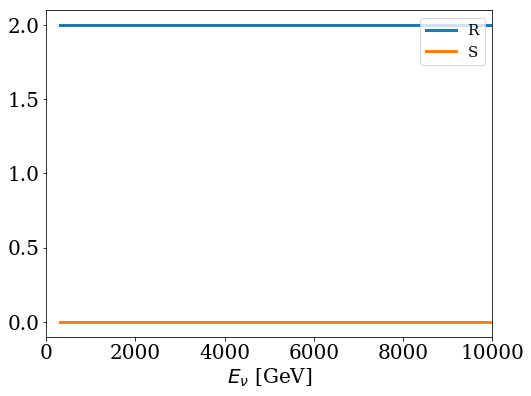

In [49]:
Erange = np.logspace(2.5,6,100) # in GeV
fr = [1,2,0]
R_array = [ RRR(fr,EE*pc.GeV) for EE in Erange ]
S_array = [ SSS(fr,EE*pc.GeV) for EE in Erange ]

plt.figure(figsize = (8,6))
#plt.semilogx(Erange,R_array, label = "R", lw = 3)
#plt.semilogx(Erange,S_array, label = "S", lw = 3)

plt.plot(Erange,R_array, label = "R", lw = 3)
plt.plot(Erange,S_array, label = "S", lw = 3)

plt.xlim(0,10000)

plt.xlabel(r"$E_\nu$ [GeV]")
plt.legend(fancybox = True, loc = "upper right", fontsize = 15)

# Flavor Triangle 

In [50]:
def PointToList(p1,p2):
    return [[p1[0],p2[0]],[p1[1],p2[1]]]

In [51]:
def PointFromFlavor(origin,scale,flavor_ratio_list):
    nu_e_vec = np.array([1.,0.])*scale
    nu_mu_vec = np.array([1./2.,np.sqrt(3.)/2.])*scale
    nu_tau_vec = np.array([-1./2.,np.sqrt(3.)/2.])*scale
    
    #if( abs(sum(flavor_ratio_list) -1) > 1.0e-3 ):
    #    print "violate unitarity! STOP"
    
    fpos = origin + flavor_ratio_list[0]*nu_e_vec + flavor_ratio_list[1]*nu_mu_vec
    return [fpos[0],fpos[1]]

In [52]:
def MakeFlavorTriangle(list_of_flavor_ratios, scale = 8,
                       p = np.array([0.,0.]), save_file = False, PlotPoints = False, PlotTrayectories = False,
                       filename = "triangle",icolor = "green", icolormap = "Greens", divisions = 5, initial_flavor_ratio = [1,0,0],
                       term = "a", subdivisions = False, triangle_collection = None):
    # i will be nice ...
    list_of_flavor_ratios = np.array(list_of_flavor_ratios)
    
    fig = plt.figure(figsize=(scale,scale), frameon = False)
    
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')

    # delete extra lines
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    
    s0 = np.array([1.,0.])*scale
    s1 = np.array([1./2.,np.sqrt(3.)/2.])*scale
    s2 = np.array([1./2.,-np.sqrt(3.)/2.])*scale

    # make triangle outer frame

    plt.plot(*PointToList(p, p+s0), color = "k", lw = 3)
    plt.plot(*PointToList(p, p+s1), color = "k", lw = 2)
    plt.plot(*PointToList(p+s0, p+s1), color = "k", lw = 2)

    # put outer triangle labels

    ax.text((p+s0*0.5)[0], (p+s0*0.5-np.array([0,0.075*scale]))[1],r"$f_{e,\oplus}$",
                horizontalalignment="center",fontsize = 25)
    ax.text((p+s1*0.5-0.1*s0)[0], (p+s1*0.5-0.1*s0)[1],r"$f_{\tau,\oplus}$",
                horizontalalignment="center",fontsize = 25)
    ax.text((p+s1*0.5 + 0.6*s0)[0], (p+s1*0.5 + 0.6*s0)[1],r"$f_{\mu,\oplus}$",
                horizontalalignment="center",fontsize = 25)

    # construct triangle grid
    for i in range(divisions+1):
        subsize = 1./float(divisions)

        ax.text((p+s0*subsize*float(i))[0], (p+s0*subsize*float(i)-np.array([0,0.025*scale]))[1],str(i*subsize),
                horizontalalignment="center",fontsize = 14)
        plt.plot(*PointToList(p+s0*subsize*float(i), p+s1+s2*subsize*float(i)), color = "k", lw = 1, ls = "dashed")
        ax.text((p+s1-s1*subsize*float(i)-np.array([0.025*scale,0.0]))[0], (p+s1-s1*subsize*float(i))[1],str(i*subsize),
                horizontalalignment="center",fontsize = 14)
        plt.plot(*PointToList(p+s0*subsize*float(divisions-i), p+s1-s1*subsize*float(i)), color = "k", lw = 1, ls = "dashed")

        ax.text((p+s1+s2*subsize*float(i)+np.array([0.025*scale,0.0]))[0], (p+s1+s2*subsize*float(i))[1],str((divisions-i)*subsize),
                horizontalalignment="center",fontsize = 14)
        plt.plot(*PointToList(p+s1*subsize*float(divisions-i), p+s1+s2*subsize*float(i)), color = "k", lw = 1, ls = "dashed")

        if subdivisions and i < divisions:
            plt.plot(*PointToList(p+s0*subsize*float(i+0.5), p+s1+s2*subsize*float(i+0.5)), color = "k", lw = 0.75, ls = "dotted")
        if subdivisions and i > 0:
            plt.plot(*PointToList(p+s0*subsize*float(divisions-(i-0.5)), p+s1-s1*subsize*float(i-0.5)), color = "k", lw = 0.75, ls = "dotted")            
            plt.plot(*PointToList(p+s1*subsize*float(divisions-(i-0.5)), p+s1+s2*subsize*float(i-0.5)), color = "k", lw = 0.75, ls = "dotted")


    # plot triangle collection
    if (triangle_collection != None):
        # get total number of points
        total_points = float(sum([ triangle.number_of_points for triangle in triangle_collection]))
        max_points = float(max([ triangle.number_of_points for triangle in triangle_collection]))
        color_map = plt.get_cmap(icolormap)
        for triangle in triangle_collection:
            if triangle.number_of_points > 0:
                xx,yy = zip(*triangle.coordinates)
                plt.fill(xx,yy,lw = 0., zorder = -1, color = color_map(float(triangle.number_of_points)/max_points))
                
        # the color bar magic
        # location set on 0 to 1 scales.
        left = 0.1
        bottom = -0.15
        width = 0.8
        height = 0.025
        cbaxes = fig.add_axes([left,bottom,width,height])
        norm = mpl.colors.Normalize(vmin = 0., vmax = max_points)
        triangle_colorbar = mpl.colorbar.ColorbarBase(cbaxes, cmap = color_map, norm = norm, 
                                                      orientation = "horizontal", spacing = "proportional",
                                                      format ='%1i')
        cbaxes.set_xlabel("Number of models", fontsize = 14)
        
    # plot flavor ratio points
    if PlotTrayectories :
        if len(list_of_flavor_ratios.shape) == 3 :
            for flavor_ratio_l in list_of_flavor_ratios:
                flv_ratio_coords = map(lambda f:PointFromFlavor(p,scale,np.array(f)),flavor_ratio_l)
                xc, yc = zip(*flv_ratio_coords)
                plt.plot(xc,yc, color = icolor,
                        ms = 10, linewidth = 4, zorder = 0)        
        elif len(list_of_flavor_ratios.shape) == 2 :
            flv_ratio_coords = map(lambda f:PointFromFlavor(p,scale,np.array(f)),list_of_flavor_ratios)
            xc, yc = zip(*flv_ratio_coords)
    
            plt.plot(xc,yc, color = icolor,
                    ms = 10, linewidth = 4, zorder = 0)
        else:
            raise NameError('Check your input flavor list array and the joined flag. Love CA.')
    elif PlotPoints:
        if len(list_of_flavor_ratios.shape) !=2 :
            print len(list_of_flavor_ratios.shape)
            raise NameError('Check your input flavor list array and the joined flag. Love CA.')
        for flavor_ratio in list_of_flavor_ratios : 
            print "estoy aqui"
            plt.plot(*PointFromFlavor(p,scale,np.array(flavor_ratio)), color = icolor,
                     marker = 'o', ms = 10, linewidth = 0,
                     markeredgecolor=None,markeredgewidth=0.0, zorder = 0)


    
    # put back color scale axis
    
    
    ax.text((s0/5.+0.9*s1)[0],(s0/5.+0.9*s1)[1],
            "LV "+term+"-term scan with\n $\ \phi_e:\ \phi_\\mu:\ \phi_\\tau = "+str(initial_flavor_ratio[0])+":\ "+str(initial_flavor_ratio[1])+":\ "+str(initial_flavor_ratio[2])+"$",
            fontsize = 20)

    if(save_file):
        # save figure
        plt.savefig("./plots/"+filename+".eps", dpi = 600, bbox_inches='tight')
    else:
        # show figure
        plt.show()

# Parameter Scan

In [53]:
import scipy.interpolate as interpolate
import scipy.integrate as integrate
import scipy as sp

In [54]:
# first we sample from the variables
n_sample = 100

# anarchy sample scheme
th12_sample = np.arcsin(np.sqrt(np.random.uniform(0.,1., size=n_sample)))
th13_sample = np.arccos(np.sqrt(np.sqrt(np.random.uniform(0.,1., size=n_sample))))
th23_sample = np.arcsin(np.sqrt(np.random.uniform(0.,1., size=n_sample)))
delta_sample = np.random.uniform(0.,2.*np.pi, size=n_sample)

# uniform sample scheme
#th12_sample = np.random.uniform(0.,2.*np.pi, size=n_sample)
#th13_sample = np.random.uniform(0.,2.*np.pi, size=n_sample)
#th23_sample = np.random.uniform(0.,2.*np.pi, size=n_sample)
#delta_sample = np.random.uniform(0.,2.*np.pi, size=n_sample)

LV_scale_1 = np.random.uniform(-1.,1.,size=n_sample)*1.0e-26*pc.GeV
LV_scale_2 = np.random.uniform(-10.,10.,size=n_sample)*1.0e-26*pc.GeV

In [55]:
lv_term = MT.LVP()
    
lv_term.th12 = th12_sample[0]
lv_term.th13 = th13_sample[0]
lv_term.th23 = th23_sample[0]
lv_term.delta1 = delta_sample[0]
    
lv_term.LVS21 = LV_scale_1[0]
lv_term.LVS31 = LV_scale_2[0]
    
lv_term.Refresh()
    
LVATERM = MT.LVTerm(lv_term);

In [56]:
sum(FlavorRatio( np.array([0.,1.,0.]) , 1.0*pc.GeV,LVATERM=LVATERM))

1.0000000000000004

In [57]:
def GenerateFlavorRatioPoints(Initial_Flavor_Ratio, gamma = 2.0,
                              Log10Emax = 7., Log10Emin = 4.0, Epoints = 30, 
                              save_list = False, save_avg = True):
    flavor_tray_list = []
    flavor_avg_list = []

    # energy things
    spectral_function = lambda Enu: Enu**(-gamma)

    Erange = np.logspace(Log10Emin,Log10Emax,Epoints) # in GeV
    Emin = Erange[0]
    Emax = Erange[-1]

    if gamma == 1 or gamma == 1.0:
        spectral_normalization = np.log(Emax)-np.log(Emin)
    else:
        spectral_normalization = (Emax**(1.-gamma) - Emin**(1.-gamma))/(1.-gamma)

    # loop over random parameters
    for i in range(n_sample):
        lv_term = MT.LVP()

        lv_term.th12 = th12_sample[i]
        lv_term.th13 = th13_sample[i]
        lv_term.th23 = th23_sample[i]
        lv_term.delta1 = delta_sample[i]

        lv_term.LVS21 = LV_scale_1[i]
        lv_term.LVS31 = LV_scale_2[i]

        lv_term.Refresh()

        LVTERM = MT.LVTerm(lv_term);

        flavor_ratio_list = np.array(map(lambda Enu : FlavorRatio(Initial_Flavor_Ratio, Enu*pc.GeV, LVATERM = LVTERM), Erange))

        if save_avg: 
            if Epoints != 1:
                flavor_avg = [0.]*lv_term.numneu
                for alpha in range(lv_term.numneu):
                    inter = interpolate.interp1d(Erange,flavor_ratio_list[:,alpha])
                    flavor_avg[alpha] = integrate.quad(lambda Enu : inter(Enu)*spectral_function(Enu),
                                                       Emin,Emax, limit = 1000, epsrel = 1e-6, epsabs = 0)[0]/spectral_normalization
                flavor_avg_list.append(flavor_avg)
            else:
                flavor_avg = flavor_ratio_list[0]
                flavor_avg_list.append(flavor_avg)

        if save_list:    
            flavor_tray_list.append(flavor_ratio_list)

    if save_list and save_avg:
        return flavor_tray_list, flavor_avg_list
    elif save_list:
        return flavor_tray_list
    elif save_avg:
        return flavor_avg_list
    else :
        print "Math is broken."
        return None

In [58]:
Initial_Flavor_Ratio = np.array([0.,1.,0.]) 
#Initial_Flavor_Ratio = np.array([0.33,0.66,0.])

flavor_tray_list = []
flavor_avg_list = []

# energy things
gamma = 2.0
spectral_function = lambda Enu: Enu**(-gamma)

Erange = np.logspace(4.,7.,50) # in GeV
Emin = Erange[0]
Emax = Erange[-1]

if gamma == 1 or gamma == 1.0:
    spectral_normalization = np.log(Emax)-np.log(Emin)
else:
    spectral_normalization = (Emax**(1.-gamma) - Emin**(1.-gamma))/(1.-gamma)

for i in range(n_sample):
    lv_term = MT.LVP()
    
    lv_term.th12 = th12_sample[i]
    lv_term.th13 = th13_sample[i]
    lv_term.th23 = th23_sample[i]
    lv_term.delta1 = delta_sample[i]
    
    lv_term.LVS21 = LV_scale_1[i]
    lv_term.LVS31 = LV_scale_2[i]
    
    lv_term.Refresh()
    
    LVTERM = MT.LVTerm(lv_term);
    
    flavor_ratio_list = np.array(map(lambda Enu : FlavorRatio(Initial_Flavor_Ratio, Enu*pc.GeV, LVATERM = LVTERM), Erange))
    
    #print i,flavor_ratio_list, sum(flavor_ratio_list)
    #if(sum(flavor_ratio_list)> 1.0):
    #    break
    
    flavor_avg = [0.]*lv_term.numneu
    for alpha in range(lv_term.numneu):
        inter = interpolate.interp1d(Erange,flavor_ratio_list[:,alpha])
        flavor_avg[alpha] = integrate.quad(lambda Enu : inter(Enu)*spectral_function(Enu),
                                           Emin,Emax, limit = 1000, epsrel = 1e-6, epsabs = 0)[0]/spectral_normalization

    flavor_avg_list.append(flavor_avg)
    flavor_tray_list.append(flavor_ratio_list)

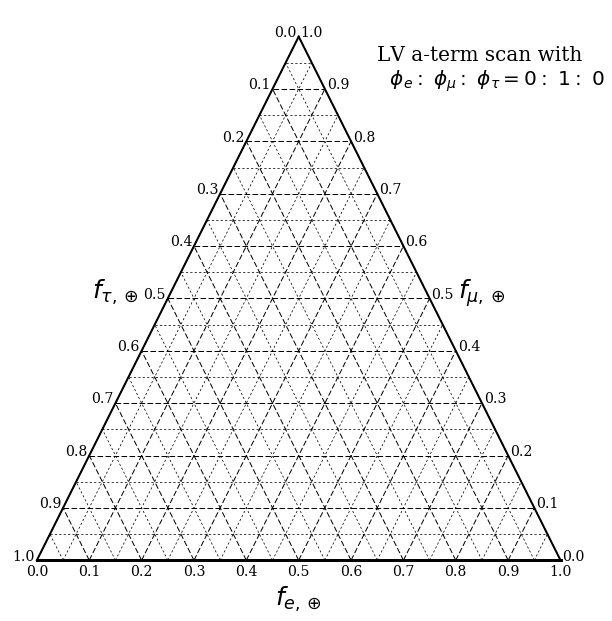

In [62]:
MakeFlavorTriangle(flavor_tray_list,
                   divisions = 10, save_file=True, filename = "i_numu_tray", icolor = "g",
                   initial_flavor_ratio = [0,1,0], subdivisions = True, PlotTrayectories = True)

In [64]:
electron = 0; mu = 1; tau = 2; division = 10; scale = 10;

flavor = np.array([0.13,0.43,0.24])
import LVCPT as lv
triangle_collection = lv.GenerateTriangles(scale,division)

print flavor

print len(triangle_collection)

u_j = int(flavor[electron]*float(division))
u_i = int((1.0-flavor[tau])*float(division))
u_i = int((flavor[mu])*float(division))

print (1.0-flavor[tau])*float(division), u_i

index = u_j*(2*division-u_j+1) + 2*(u_i)
print u_j,u_i,index
triangle_1 = triangle_collection[index]
triangle_2 = triangle_collection[index+1]
print triangle_1.coordinates,"\n", triangle_2.coordinates, "\n",PointFromFlavor([0.,0], scale,flavor)

point = PointFromFlavor([0.,0], scale,flavor)
print triangle_1.IsPointIn(point),"\n",triangle_2.IsPointIn(point)

#for triangle in triangle_collection:
#    if (triangle.IsPointIn(point)):
#        print triangle.i,triangle.j,triangle.n_t
    
triangle_collection[index].number_of_points = 100
triangle_collection[index+1].number_of_points = 100

ImportError: No module named cLVCPT

In [66]:
import LVCPT as lv

estoy aqui


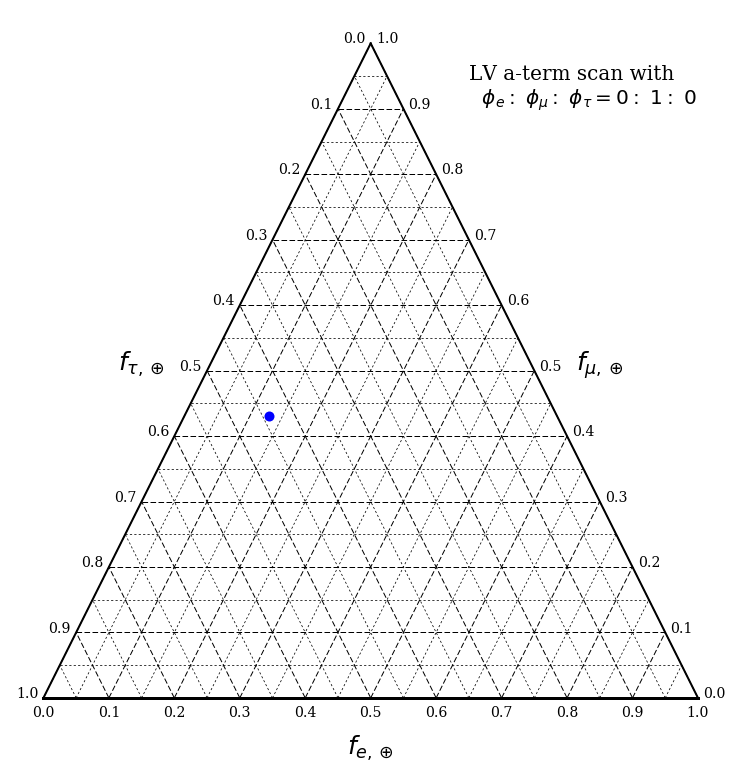

In [67]:
MakeFlavorTriangle(np.array([flavor]), divisions = 10, save_file=True, scale = 10,
                   filename = "i_numu_hist", icolor = "b", icolormap = "Greens", 
                   triangle_collection=None,
                   initial_flavor_ratio = [0,1,0], subdivisions = True, PlotPoints = True)

estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui

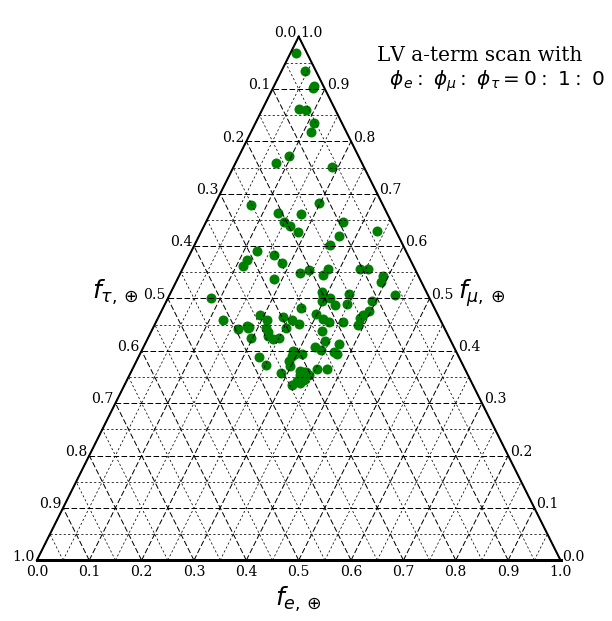

In [68]:
MakeFlavorTriangle(flavor_avg_list, divisions = 10, save_file=True, 
                   filename = "i_numu_avg", icolor = "g",
                   initial_flavor_ratio = [0,1,0], subdivisions = True, PlotPoints = True)

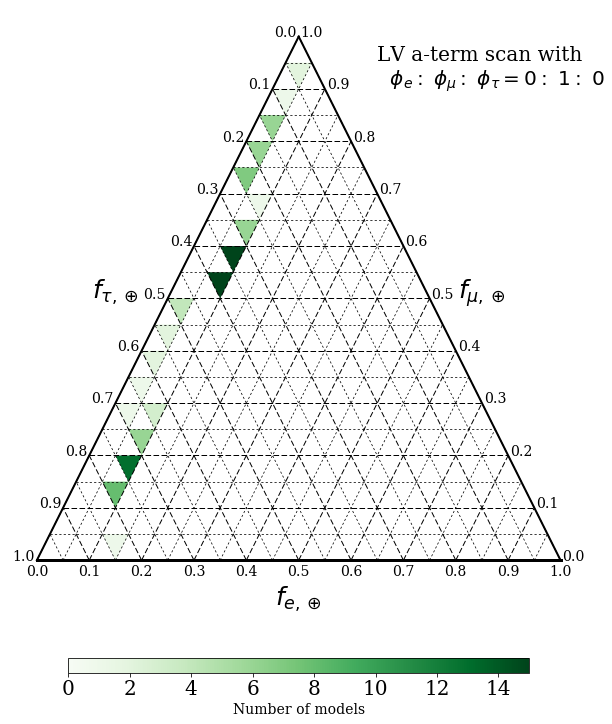

In [71]:
scale = 8; divisions = 10
triangle_collection = lv.GenerateTriangles(scale,divisions*2)
map(lambda f : lv.AddPointToTriangleCollection(f,triangle_collection),flavor_avg_list)

MakeFlavorTriangle(flavor_avg_list, divisions = 10, save_file=True, 
                   filename = "i_numu_hist", icolor = "g", icolormap = "Greens", triangle_collection=triangle_collection,
                   initial_flavor_ratio = [0,1,0], subdivisions = True)

In [72]:
Initial_Flavor_Ratio = np.array([0.,1.,0.]) 
#Initial_Flavor_Ratio = np.array([0.33,0.66,0.])

n_sample = 100
# uniform sample scheme
th12_sample = np.random.uniform(0.,2.*np.pi, size=n_sample)
th13_sample = np.random.uniform(0.,2.*np.pi, size=n_sample)
th23_sample = np.random.uniform(0.,2.*np.pi, size=n_sample)
delta_sample = np.random.uniform(0.,2.*np.pi, size=n_sample)
LV_scale = np.random.uniform(-10.,10.,size=n_sample)*1.0e-29


flavor_tray_list = []
flavor_avg_list = []

# energy things
gamma = 2.0
spectral_function = lambda Enu: Enu**(-gamma)

Erange = np.logspace(4.,7.,50) # in GeV
Emin = Erange[0]
Emax = Erange[-1]

if gamma == 1 or gamma == 1.0:
    spectral_normalization = np.log(Emax)-np.log(Emin)
else:
    spectral_normalization = (Emax**(1.-gamma) - Emin**(1.-gamma))/(1.-gamma)

for i in range(n_sample):
    lv_term = MT.LVP()
    
    lv_term.th12 = th12_sample[i]
    lv_term.th13 = th13_sample[i]
    lv_term.th23 = th23_sample[i]
    lv_term.delta1 = delta_sample[i]
    
    lv_term.LVS21 = LV_scale[i]
    lv_term.LVS31 = LV_scale[i]
    
    lv_term.Refresh()
    
    LVTERM = MT.LVTerm(lv_term);
    
    flavor_ratio_list = np.array(map(lambda Enu : FlavorRatio(Initial_Flavor_Ratio, Enu*pc.GeV, LVCTERM = LVTERM), Erange))
    
    flavor_avg = [0.]*lv_term.numneu
    for alpha in range(lv_term.numneu):
        inter = interpolate.interp1d(Erange,flavor_ratio_list[:,alpha])
        flavor_avg[alpha] = integrate.quad(lambda Enu : inter(Enu)*spectral_function(Enu),
                                           Emin,Emax, limit = 1000, epsrel = 1e-6, epsabs = 0)[0]/spectral_normalization

    flavor_avg_list.append(flavor_avg)
    flavor_tray_list.append(flavor_ratio_list)

/Users/rkhandelwal/anaconda/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


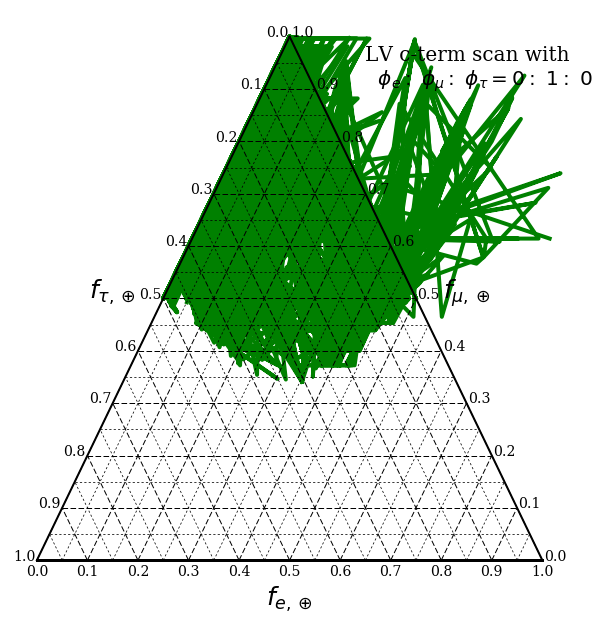

In [73]:
MakeFlavorTriangle(flavor_tray_list,
                   divisions = 10, save_file=True, PlotTrayectories = True,
                   filename = "i_numu_tray_cterm", icolor = "g", subdivisions = True,
                   initial_flavor_ratio = [0,1,0], term = "c")

estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui
estoy aqui

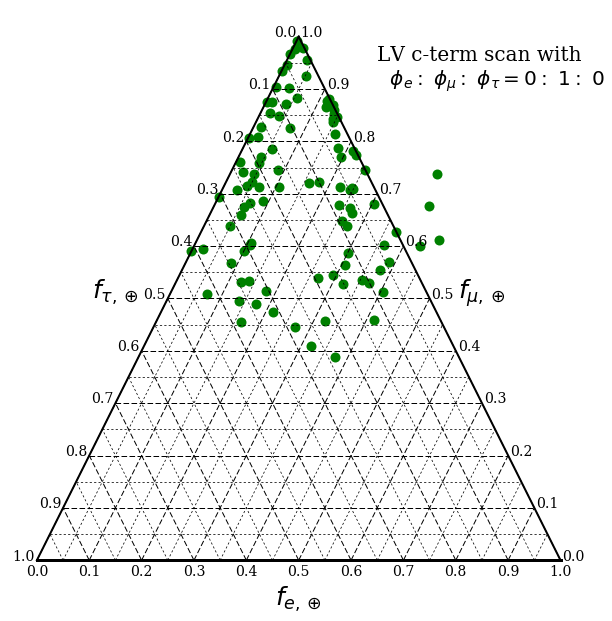

In [75]:
MakeFlavorTriangle(flavor_avg_list, divisions = 10,
                   save_file=True, filename = "i_numu_avg_cterm",
                   icolor = "g", PlotPoints = True, subdivisions = True,
                   initial_flavor_ratio = [0,1,0], term = "c")

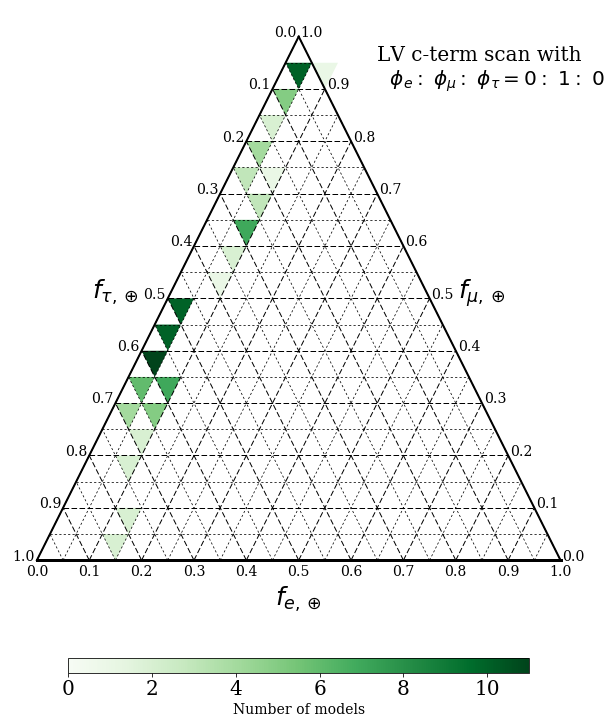

In [77]:
scale = 8
triangle_collection = lv.GenerateTriangles(scale,divisions*2)
map(lambda f : lv.AddPointToTriangleCollection(f,triangle_collection),flavor_avg_list)

MakeFlavorTriangle(flavor_avg_list, divisions = 10, save_file=True, 
                   filename = "i_numu_hist_cterm", icolor = "g", icolormap = "Greens", triangle_collection=triangle_collection,
                   initial_flavor_ratio = [0,1,0],term = "c",subdivisions = True)

## Counting points in a triangle grid

In [79]:
from numpy import linalg as LA

In [80]:
# we will use the bariocentric method and assume that the points 
# in the triangle are given counter clockwise
def s_bario(p,p0,p1,p2):
    return (p0[1]*p2[0] - p0[0]*p2[1] + (p2[1] - p0[1])*p[0] + (p0[0] - p2[0])*p[1])

def t_bario(p,p0,p1,p2):
    return (p0[0]*p1[1] - p0[1]*p1[0] + (p0[1] - p1[1])*p[0] + (p1[0] - p0[0])*p[1])

def IsInTriangle(p,p0,p1,p2,area):
    s = s_bario(p,p0,p1,p2)
    t = t_bario(p,p0,p1,p2)
    print "triangle conditions", s,t,2.0*area - s - t
    return  s >= -1.0e-15 and  t >= -1.0e-15 and s+t <= 2.0*area

In [81]:
scale = 1.; p = np.array([0.,0.])


divisions = 10
p_test = [1.5,0.5]

In [82]:
class Triangle:
    coordinates = []
    area = 0.0
    number_of_points = 0.0
    n_t = 0
    i = 0 
    j = 0
    orientation = ""
    
    def IsPointIn(self,point):
        p0 = self.coordinates[0]
        p1 = self.coordinates[1]
        p2 = self.coordinates[2]
        return IsInTriangle(point,p0,p1,p2,self.area)

In [83]:
def GenerateTriangles(scale, divisions, p = np.array([0.,0.])):
    s0 = np.array([1.,0.])*scale/float(divisions)
    s1 = np.array([1./2.,np.sqrt(3.)/2.])*scale/float(divisions)
    s2 = np.array([1./2.,-np.sqrt(3.)/2.])*scale/float(divisions)
    
    area = np.sqrt(3)*(LA.norm(s0)/2.0)**2
    
    n_t = 0
    
    triangle_collection = []
    for i in range(divisions):
        for j in range(divisions-i):
            lower_triangle = Triangle()

            p0_l = p + i*s0 + j*s1 
            p1_l = p0_l + s0
            p2_l = p0_l + s1
            
            lower_triangle.coordinates = [p0_l,p1_l,p2_l]
            lower_triangle.n_t = n_t
            lower_triangle.i = i
            lower_triangle.j = j
            lower_triangle.orientation = "L"
            lower_triangle.area = area
            
            n_t += 1
            # append to triangle collection
            triangle_collection.append(lower_triangle)
            
            upper_triangle = Triangle()

            p0_u = p2_l
            p1_u = p1_l
            p2_u = p1_l + s1
            
            upper_triangle.coordinates = [p0_u,p1_u,p2_u]
            upper_triangle.n_t = n_t
            upper_triangle.i = i
            upper_triangle.j = j
            upper_triangle.orientation = "U"
            upper_triangle.area = area
            
            n_t += 1
            # append to triangle collection
            triangle_collection.append(upper_triangle)
    return triangle_collection

In [84]:
def AddPointToTriangleCollection(flavor_ratio, triangle_collection,
                  p = np.array([0.,0.])):
    point = PointFromFlavor(p,scale,np.array(flavor_ratio))
    
    for triangle in triangle_collection:
        if(triangle.IsPointIn(point)):
            triangle.number_of_points += 1.
    

In [85]:
Number_of_Triangles = (divisions*(divisions+1)/2)*2

triangle conditions 0.292334264277 1.66844129368 -1.82221149335
triangle conditions -1.52987722907 1.82221149335 -0.153770199672
triangle conditions 0.292334264277 1.52987722907 -1.68364742874
triangle conditions -1.39131316447 1.68364742874 -0.153770199672
triangle conditions 0.292334264277 1.39131316447 -1.54508336414
triangle conditions -1.25274909986 1.54508336414 -0.153770199672
triangle conditions 0.292334264277 1.25274909986 -1.40651929953
triangle conditions -1.11418503526 1.40651929953 -0.153770199672
triangle conditions 0.292334264277 1.11418503526 -1.26795523493
triangle conditions -0.97562097065 1.26795523493 -0.153770199672
triangle conditions 0.292334264277 0.97562097065 -1.12939117032
triangle conditions -0.837056906044 1.12939117032 -0.153770199672
triangle conditions 0.292334264277 0.837056906044 -0.990827105716
triangle conditions -0.698492841439 0.990827105716 -0.153770199672
triangle conditions 0.292334264277 0.698492841439 -0.85226304111
triangle conditions -0.5599

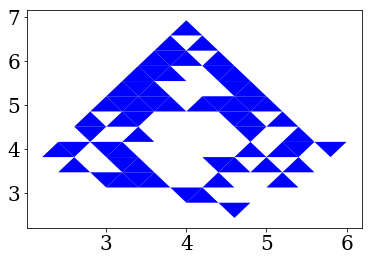

In [86]:
scale = 8
triangle_collection = GenerateTriangles(scale,divisions*2)
map(lambda f : AddPointToTriangleCollection(f,triangle_collection),flavor_avg_list)

for triangle in triangle_collection:
    if triangle.number_of_points > 0:
        xx,yy = zip(*triangle.coordinates)
        plt.fill(xx,yy,lw = 0., color = "b")

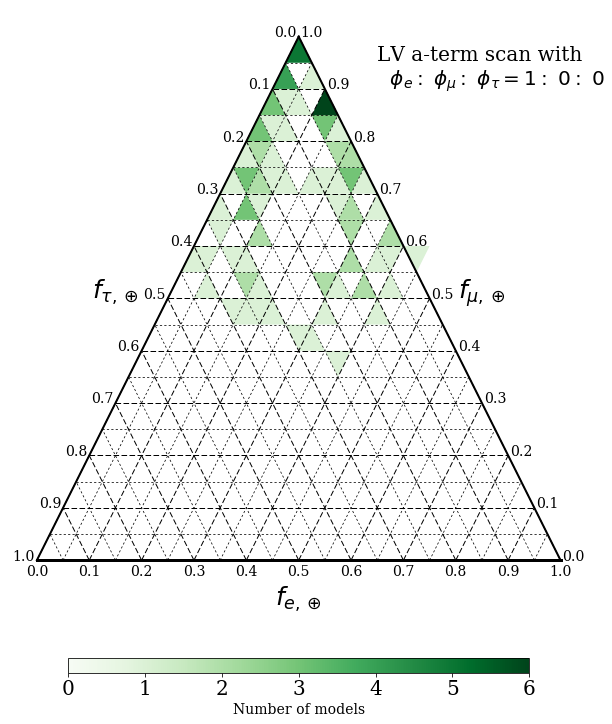

In [87]:
MakeFlavorTriangle(flavor_avg_list, 
                   divisions = 10, subdivisions=True,
                   triangle_collection=triangle_collection, PlotPoints = False)

(5.6000000000000005, 5.8000000000000007, 6.0000000000000009) (4.156921938165306, 3.8105117766515302, 4.156921938165306)


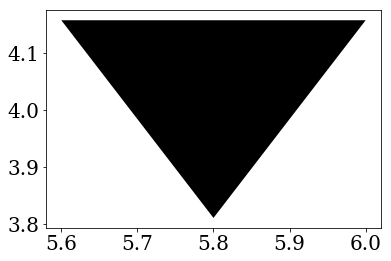

In [88]:
print xx, yy
plt.fill(xx,yy, lw = 0., color = "k")

In [89]:
cmap = plt.get_cmap("Reds")

In [90]:
%man np.r_

In [91]:
map(cmap,np.arange(0.,1.0,0.1))

[(1.0, 0.96078431372549022, 0.94117647058823528, 1.0),
 (0.99692425990003841, 0.89619377162629754, 0.84890426758938864, 1.0),
 (0.99137254901960792, 0.79137254901960785, 0.70823529411764707, 1.0),
 (0.9882352941176471, 0.67154171472510571, 0.56053825451749328, 1.0),
 (0.98745098039215684, 0.54117647058823526, 0.41568627450980394, 1.0),
 (0.98357554786620527, 0.4127950788158401, 0.28835063437139563, 1.0),
 (0.94666666666666666, 0.26823529411764707, 0.19607843137254902, 1.0),
 (0.85033448673587075, 0.14686658977316416, 0.13633217993079583, 1.0),
 (0.7364705882352941, 0.080000000000000002, 0.10117647058823528, 1.0),
 (0.59461745482506734, 0.046136101499423293, 0.075586312956555157, 1.0)]

In [92]:
plt.get_cmap("Greens")

In [93]:
mpl.colors.Normalize

matplotlib.colors.Normalize

# Profiling

In [94]:
import cProfile

In [95]:
cProfile.run('GenerateFlavorRatioPoints(np.array([0.,1.,0.]), gamma = 2.0,Log10Emax = 7., Log10Emin = 4.0, Epoints = 1, save_list = False, save_avg = True)') 

         20010 function calls in 0.082 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      300    0.003    0.000    0.003    0.000 <ipython-input-14-7a0b1f83bab3>:1(Hamiltonian)
      900    0.014    0.000    0.015    0.000 <ipython-input-42-02367e4fcf7c>:1(OscProbFromMixingMatrix)
      300    0.002    0.000    0.046    0.000 <ipython-input-43-63cc73a0043c>:1(OscProb)
      100    0.002    0.000    0.048    0.000 <ipython-input-44-1f6cbd1ed88a>:1(FlavorRatio)
        1    0.002    0.002    0.082    0.082 <ipython-input-57-50ab86279d46>:1(GenerateFlavorRatioPoints)
      100    0.000    0.000    0.049    0.000 <ipython-input-57-50ab86279d46>:35(<lambda>)
        1    0.000    0.000    0.082    0.082 <string>:1(<module>)
      100    0.001    0.000    0.015    0.000 MinimalTools.py:126(__init__)
      100    0.000    0.000    0.005    0.000 MinimalTools.py:149(Refresh)
      100    0.001    0.000    0.001    0.000 MinimalT

In [96]:
len(xx)

3